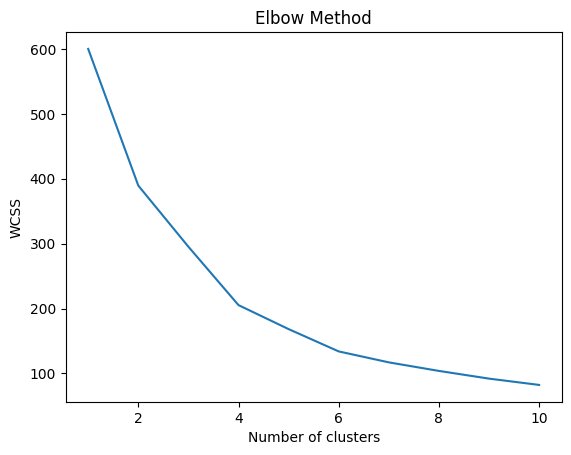

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     cluster  
0          2  
1          2  
2          2  
3          2  
4          2

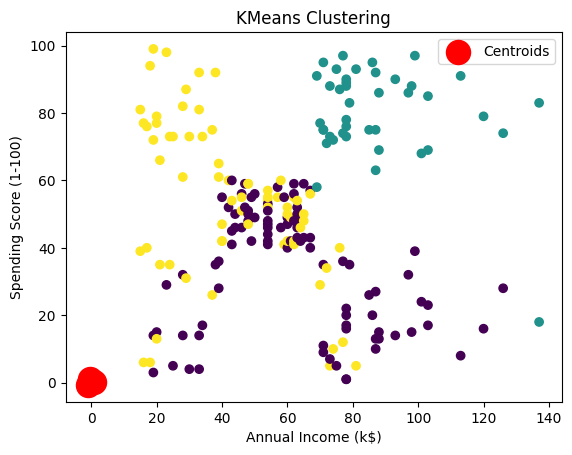

In [ ]:
# prompt: generate a k means clustering code for unsupervised learning technique and also generate elbow algorithm before clustering on the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample data (replace with your actual data)

df = pd.read_csv("/content/Mall_Customers.csv")

# Select only numerical features for scaling and clustering
# Excluding the 'Gender' and 'CustomerID' columns
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[numerical_features]


# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Elbow method to find optimal k
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Apply KMeans clustering with the chosen k (e.g., k=3 from the elbow method)
k = 3  # Replace with the optimal k value from the elbow method
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Print the cluster assignments
print(df)

# Visualize the clusters (if you have 2 features)
# Assuming 'Annual Income (k$)' and 'Spending Score (1-100)' are the features to visualize
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids') # Assuming the first two columns of scaled_features correspond to the features being visualized.
plt.title('KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
!pip install pyspark